## Timeseries analysis

### importing necessary librariries and function

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from dataset_loader_function import load_cleaned_dataset

#### Dataset preparation and analysis

In [2]:
df = load_cleaned_dataset()

e:\githubProjects\Ahmed_Manzim_Ridwan_APF_Project_WiSe_2024_25\scripts\dataset_loader_function.py:10: DtypeWarning: Columns (12,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv('../dataset/dataset_cleaned.csv')


#### Typical reason of fire origin

In [3]:
# df["distance_propane_tank"].unique()

df["fire_cause"].value_counts()

fire_cause
Unknown                                  5805
Direct flame impingement                 2529
Radiant Heat                             1563
Embers                                    730
Not Applicable                             18
Bushes                                      2
Embers or overheated electrical motor       1
Post on structure                           1
0-10                                        1
Name: count, dtype: int64

#### Dataset Analysis

In [4]:
df["incident_start_date"] = pd.to_datetime(df["incident_start_date"], errors="coerce")

# Extract year and month
df["year"] = df["incident_start_date"].dt.year
df["month"] = df["incident_start_date"].dt.strftime('%b')

fires_per_year = df["year"].value_counts().sort_index()

month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

fires_per_month = df["month"].value_counts().reindex(month_order, fill_value=0)

In [5]:
df.columns.sort_values()

Index(['apn', 'assessed_value', 'battalion', 'cal_fire_unit', 'city',
       'community', 'county', 'damage', 'damaged_outbuildings',
       'deck_porch_elevated', 'deck_porch_grade', 'defense_actions',
       'distance_propane_tank', 'distance_residence_utility', 'eaves',
       'exterior_siding', 'fence_attached', 'fire_cause',
       'fire_name_secondary', 'fire_start_location', 'global_id',
       'hazard_type', 'incident_name', 'incident_number',
       'incident_start_date', 'latitude', 'longitude', 'month',
       'non_damaged_outbuildings', 'object_id', 'patio_cover_carport',
       'roof_construction', 'site_address', 'state', 'street_name',
       'street_number', 'street_suffix', 'street_type', 'structure_category',
       'structure_type', 'units_in_structure', 'vent_screen', 'window_pane',
       'x_coordinate', 'y_coordinate', 'year', 'year_built', 'zip_code'],
      dtype='object')

In [6]:
# df.columns.sort_values()
df["distance_propane_tank"].value_counts()

distance_propane_tank
Unknown    6646
>30        6186
11-20      4154
0-10       4115
21-30      2631
              9
Name: count, dtype: int64

### Visualization based on months and year

#### Monthly Trend 

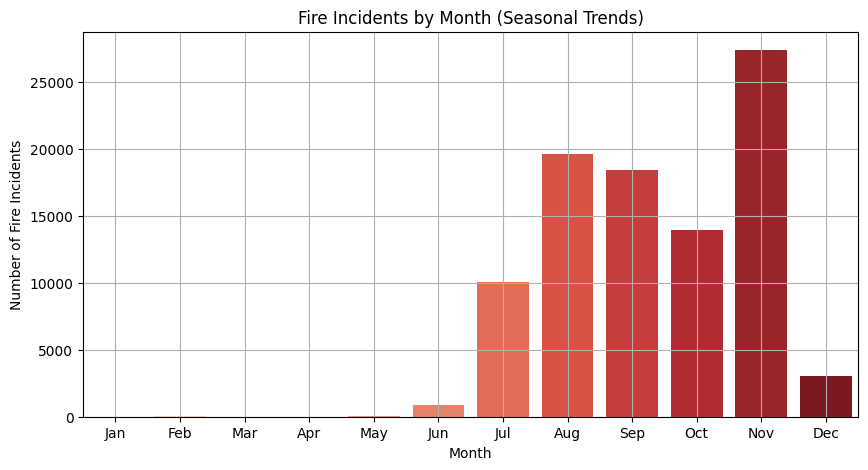

In [7]:
# Plot Monthly Breakdown
plt.figure(figsize=(10, 5))
sns.barplot(x=fires_per_month.index, y=fires_per_month.values, palette="Reds", hue=fires_per_month.index)
plt.title("Fire Incidents by Month (Seasonal Trends)")
# plt.legend(title="fires_per_month", loc="best")
plt.xlabel("Month")
plt.ylabel("Number of Fire Incidents")
plt.grid(True)
plt.show()

### Yearly Trend

C:\Users\manzi\AppData\Local\Temp\ipykernel_12120\238410937.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fires_per_year.index, y=fires_per_year.values, palette="Set1")


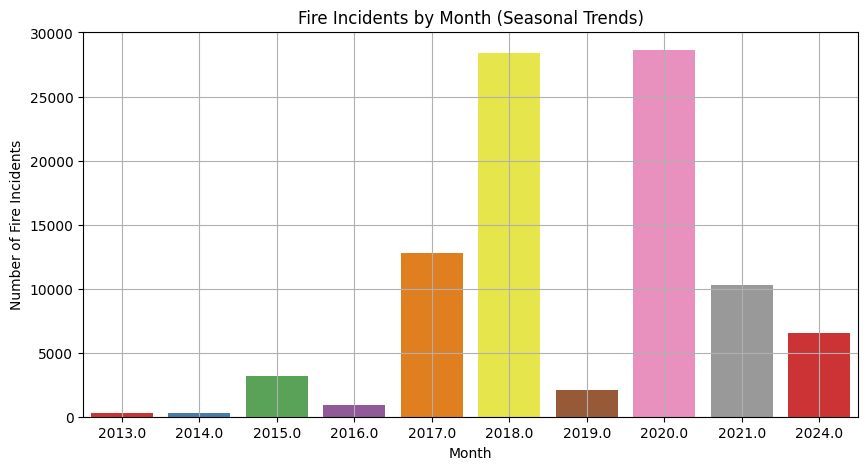

In [8]:
# Plot Monthly Breakdown
plt.figure(figsize=(10, 5))
sns.barplot(x=fires_per_year.index, y=fires_per_year.values, palette="Set1")
plt.title("Fire Incidents by Month (Seasonal Trends)")
plt.xlabel("Month")
plt.ylabel("Number of Fire Incidents")
plt.grid(True)
plt.show()